# Image encryption by combination of Rabin and ECC

### By Arpan Maity
###      Srijita Guha Roy
###      Sucheta Bhattacharjee
###      Adrita Roy Chowdhury
###      Ritobina Ghosh and
###      Dr. Chittaranjan Pradhan

In [158]:
#initialising all the values for ECC encryption
bit = []
g = 360
na = 1905302
nb = 1905215
pa = na*g
pb = nb*g
k=na*pb
ex = k*g

x: 400 
y: 300


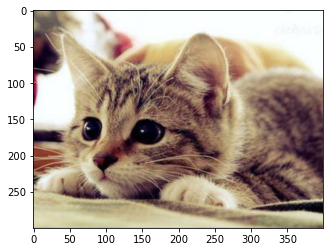

In [159]:
#importing important libraries and opening the image

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open("billu1.jpg")
x,y = img.size
plt.imshow(img)
print("x:",x,"\ny:",y)

#billu1.jpg -> 400 x 300
#h1.jpeg ->1200 X 1600
#kiit.jpeg -> 75 X 433
#kogo2.jpg -> 300 X 228
#Y22.jpg -> 294 X 380
#suchuu.jpeg -> 1080 X 1080

In [160]:
#Converting image into 1D array, defining sval and adding sval to each of the pixels

import time
time.sleep(1)
i = np.array(img)
arr=i.ravel()
sz = x*y*3
arr  = np.reshape(i,sz)
sval  = arr[100]
arr1 = arr + sval

In [161]:
def inv(x,y):      #Finds Multiplicative inverse
    flag = 0
    m = 1
    while(flag!=1):
        r = (x*m)%y
        if (r==1):
            flag = 1
        m = m + 1
    return(m-1)

def ec(pt):    #Rabin encryption for number ; returns an Integer value
    p=23
    q=7
    e = 2
    n = p*q
    ct = (pt**e) % n
    return ct

def dc(ct,pt):     #Rabin decryption for number
    p=23
    q=7
    e = 2
    n = p*q
    a1 = (ct**((p+1)/4))%p
    a2 = p-a1
    b1 = (ct**((q+1)/4))%q
    b2 = q - b1
    a = q* inv(q,p)
    b = p * inv(p,q)
    p1 = (a*a1 + b*b1)%n
    p2 = (a*a1 + b*b2)%n
    p3 = (a*a2 + b*b1)%n
    p4 = (a*a2 + b*b2)%n
    if(pt == p1):
        return p1
    elif(pt == p2):
        return p2
    elif(pt == p3):
        return p3
    elif(pt == p4):
        return p4
    else:
        print("error")
        
def utf(msg): #Converting a string to a set of utf values; returns array of numbers ; size is reduced ; utf is for strings not integers 
    cipher = []
    for part in msg:
        pm = ord(part)
        cipher.append(pm)
    return cipher

def deutf(fa):    #Reconverting the utf values to strings
    msg = ""
    sz = len(fa)
    for vi in range(0,sz):
        c = chr(fa[vi])
        msg = msg + c
    return msg

def rencec(msg):   #Rabin string encryption ; returns array of numbers
    x = utf(msg)
    sz = len(x)
    y = []
    for i in range(0,sz):
        y.append(ec(x[i]))
    return y

def reimg(px,x,y):  #Converts pixel values to image
    size = (x,y,3)
    newarray = np.reshape(px,size)
    plt.imshow(newarray)

def redec(y,sec):  #Rabin string decryption
    z = []
    sz = len(y)
    for i in range(0,sz):
        z.append(dc(y[i],sec[i]))
    for i in range(0,sz):
        z[i]=int(z[i])
    ss = deutf(z)
    return ss

def flatten(l):   # Jagged matrix to 1D array 
    lf=[]
    li=[]
    ll=[]
    lf1= []
    p=0
    for i in l:
        if type(i).__name__=='list':
            li.append(i)
        else:
               lf.append(i)
    ll=[x for i in li for x in i]
    lf.extend(ll)

    for i in lf:
        if type(i).__name__ =='list':   
            flatten(lf)
        else:
            p=p+1
            continue

    if p==len(lf):
        lf1 = lf
    return lf1

def reframe(tst): #1D array to 3D mtrix
    i=0
    x = []
    while(i!=(3*sz)):
        y=[]
        y.append(tst[i])
        y.append(tst[i+1])
        y.append(tst[i+2])
        i=i+3
        x.append(y)
    return x
def PSNR(original,recreated,sz):    #Finding peak to noise ratio (PSNR)
    cnt=0
    for i in range(0,sz):
        if(original[i] == recreated[i]):
            cnt = cnt + 1
    score = (cnt)/sz
    per = score*100
    return per

In [162]:
def rabin_enc(arr,sz):  #Rabin Image Encrytion
    arrc = [] # arrc for characters
    sz = len(arr)
    for i in range(0,sz):
        arrc.append(str(arr[i]))
    
    for i in range(0,sz):
        if(len(arrc[i])==1):
            arrc[i] = "00"+arrc[i]
        if(len(arrc[i])==2):
            arrc[i] = "0"+arrc[i]
    
    global bit
    sz1 = len(arrc)
    for i in range(0,sz):
        bit.append(utf(arrc[i]))
        
    carr = []
    for i in range(0,sz):
        carr.append(rencec(arrc[i]))
    return carr

def rabin_dec(t2,sz):  #Rabin Image Decrytion
    tt = reframe(t2)
    tl = len(tt)
    ffn = []
    for i in range(0,tl):
        ffn.append(redec(tt[i],bit[i]))
    farrn=[]
    for i in range(0,tl):
        farrn.append(int(ffn[i]))
        
    global sval
    farrn = farrn - sval
    for i in range(0,sz):
        if(farrn[i]<0):
            farrn[i] = farrn[i]+256
    return farrn

In [163]:
def rabin_enc_img(carr,sz,x,y):     #Finding out Rabin encrypted image
    tst = flatten(carr)
    reimg(tst[:sz],y,x)
    return tst
def ecc_enc_img(ee,sz,x,y):        #Finding out ECC encrypted image
    t11 = []
    for i in range(0,len(ee)):
        t11.append(ee[i]%256)
    reimg(t11[5*sz:6*sz],y,x) #6sz - 5sz

In [164]:
def ecc_enc(cipher,n):        #ECC array Encrytion
    exa = []
    eya = []
    for vi in range(0,n):
        pm = cipher[vi]
        ex = k*g
        ey = pm + k*pb
        exa.append(ex)
        eya.append(ey)
    ret = exa + eya
    return ret

def ecc_dec(code,n):       #ECC array Decrytion
    dx = []
    for vi in range(0,n):
        s1 = code[vi]*nb ##code[vi] = x
        store = code[n+vi]-s1 ##code[len(code)/2 + vi] = y
        dx.append(store)
    return dx

In [165]:
# Rabin encryption

start = time.time()
re = rabin_enc(arr1,sz)
end = time.time()
print(re[:5])
t = end - start
m = int(t//60)
s = int(t%60)
print("\nAfter Rabin Encrypton:\n")
print(f"Time: {m} min {s}sec")

[[50, 50, 128], [85, 128, 18], [85, 25, 25], [50, 147, 72], [50, 50, 85]]

After Rabin Encrypton:

Time: 0 min 4sec


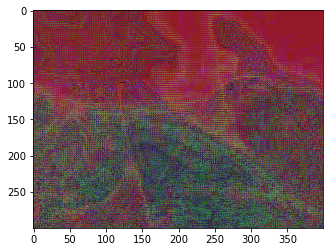

In [166]:
#Rabin encrypted image

flat_re = rabin_enc_img(re,sz,x,y)

In [167]:
# ECC encryption

start = time.time()
ee = ecc_enc(flat_re,len(flat_re))
end = time.time()
t = end - start
m = int(t//60)
s = int(t%60)
print(ee[:5])
print("\nAfter ECC encryption:\n")
print(f"Time: {m} min {s}sec")

[470449289510928000, 470449289510928000, 470449289510928000, 470449289510928000, 470449289510928000]

After ECC encryption:

Time: 0 min 2sec


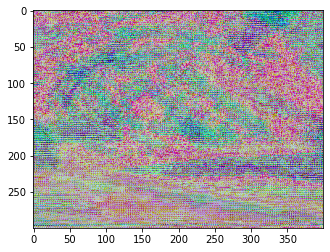

In [168]:
#ECC encrypted image

ecc_enc_img(ee,sz,x,y)

In [169]:
#ECC Decryption

start = time.time()
ed = ecc_dec(ee,int(len(ee)/2))
end = time.time()
t = end - start
m = int(t//60)
s = int(t%60)
print("After ECC Decryption:\n")
print(f"Time: {m} min {s}sec")

After ECC Decryption:

Time: 0 min 1sec


In [170]:
#Rabin Decryption

start = time.time()
rd = rabin_dec(ed,sz)
end = time.time()
t = end - start
m = int(t//60)
s = int(t%60)
print("After Rabin Decrytion: \n")
print(f"Time: {m} min {s}sec")

After Rabin Decrytion: 

Time: 0 min 15sec


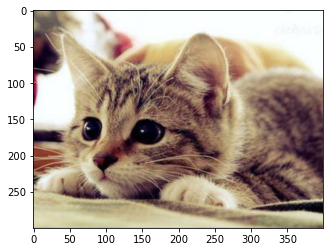

In [171]:
#Decrypted image

reimg(rd,y,x)

In [172]:
#Finding out PSNR value

scr = PSNR(arr,rd,sz)
print("PSNR: ",scr,"%")

PSNR:  100.0 %
